# Validity of using prescription records to identify patient comorbidities
## Combined Analysis of dementia

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|HDRUK code list|
|drug codes|bnf selection|
|sql date|13.03.2025|
|sql code|dementiaselection_202050313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [dementia_425000_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)

/* different age groups! */
egen agecat = cut(age), at(0,70,90,120)
label def agecat_lab 0 "Young" 70 "0Middle" 90 "Elderly" 120 "weird"
label values agecat agecat_lab

egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab

replace bnf_code = "Drugs for dementia" if bnf_code== "041100"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"


encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

/* put Wales and missing into NORTH WEST */
replace region_name = "NORTH WEST COMMISSIONING REGION" if strlen(region_name)<6

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)


(4,923 missing values generated)
(4,923 real changes made)
(10,169 missing values generated)
(10,169 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str18
(4,892 real changes made)
(31 real changes made)
variable ethnicity was str2 now str6
(257,981 real changes made)
(3,762 real changes made)
(23,912 real changes made)
(7,430 real changes made)
(8,764 real changes made)
variable ethnicity was str6 now str7
(123,151 real changes made)
(3,996 real changes made)


(bin=19, start=16, width=5)


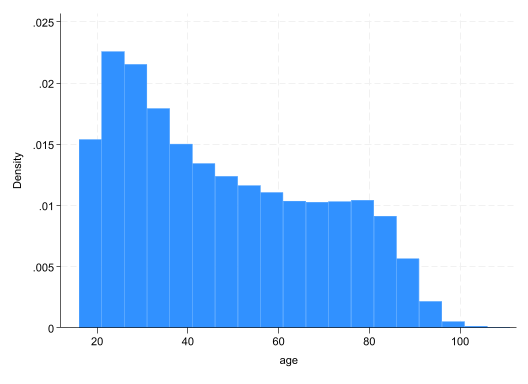

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +---------------------------------------------------------------------------------------------------------------------------------
> -------------------------+
  | description                                                                                                                     
>  Freq.   Percent     %<= |
  |---------------------------------------------------------------------------------------------------------------------------------
> -------------------------|
  | Dementia                                                                                                                        
>   1406     13.83   13.83 |
  | Dementia care plan reviewed (situation)                                                                                         
>   1145     11.26   25.09 |
  | Alzheimer's disease                                                                                                             
>   1138     11.19   36.28 |
  | Vascular dementia (diso

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +-----------------------------------------------+
  |           bnf_code   Freq.   Percent      %<= |
  |-----------------------------------------------|
  | Drugs for dementia    4892     99.37    99.37 |
  |      Other/unknown      31      0.63   100.00 |
  +-----------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,197      5,972 |    10,169 
    Normal |       726    414,105 |   414,831 
-----------+----------------------+----------
     Total |     4,923    420,077 |   425,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.4%      2.3%       2.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.3%     40.3%     42.2%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    235.83    218.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,521      2,060 |     3,581 
    Normal |       272    204,432 |   204,704 
-----------+----------------------+----------
     Total |     1,793    206,492 |   208,285 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.7%       1.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.5%     40.8%     44.1%
Specificity                      Pr(-|N)     99.9%     99.9%     99.9%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    319.66    282.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,676      3,912 |     6,588 
    Normal |       454    209,664 |   210,118 
-----------+----------------------+----------
     Total |     3,130    213,576 |   216,706 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      3.0%      3.0%       3.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.6%     39.4%     41.8%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.70      0.70      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    187.99    170.

#### Age
*16-70*

In [10]:
diagt diag test if agecat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       368        621 |       989 
    Normal |        84    337,996 |   338,080 
-----------+----------------------+----------
     Total |       452    338,617 |   339,069 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.3%      0.3%       0.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     37.2%     34.2%     40.3%
Specificity                      Pr(-|N)    100.0%    100.0%    100.0%
ROC area               (Sens. + Spec.)/2      0.69      0.67      0.70 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    1497.59   1191

*70-90*

In [11]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,408      4,389 |     7,797 
    Normal |       571     69,729 |    70,300 
-----------+----------------------+----------
     Total |     3,979     74,118 |    78,097 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     10.0%      9.8%      10.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     43.7%     42.6%     44.8%
Specificity                      Pr(-|N)     99.2%     99.1%     99.3%
ROC area               (Sens. + Spec.)/2      0.71      0.71      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     53.81     49.

In [12]:
diagt diag test if agecat==90


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       421        962 |     1,383 
    Normal |        71      6,380 |     6,451 
-----------+----------------------+----------
     Total |       492      7,342 |     7,834 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     17.7%     16.8%      18.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     30.4%     28.0%     32.9%
Specificity                      Pr(-|N)     98.9%     98.6%     99.1%
ROC area               (Sens. + Spec.)/2      0.65      0.63      0.66 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     27.66     21.

#### Year at start of oberservation period 
*2004-2009*

In [14]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       630      1,552 |     2,182 
    Normal |       308    147,510 |   147,818 
-----------+----------------------+----------
     Total |       938    149,062 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.5%      1.4%       1.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     28.9%     27.0%     30.8%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.64      0.63      0.65 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    138.57    121.

*2010-2015*

In [15]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,547      2,120 |     3,667 
    Normal |       274    146,059 |   146,333 
-----------+----------------------+----------
     Total |     1,821    148,179 |   150,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.4%      2.4%       2.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.2%     40.6%     43.8%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    225.31    198.

*2016-2020*

In [16]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,020      2,300 |     4,320 
    Normal |       144    120,536 |   120,680 
-----------+----------------------+----------
     Total |     2,164    122,836 |   125,000 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      3.5%      3.4%       3.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     46.8%     45.3%     48.3%
Specificity                      Pr(-|N)     99.9%     99.9%     99.9%
ROC area               (Sens. + Spec.)/2      0.73      0.73      0.74 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    391.87    331.

#### IMD of practice
*1-3*

In [17]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,279      1,920 |     3,199 
    Normal |       203    151,149 |   151,352 
-----------+----------------------+----------
     Total |     1,482    153,069 |   154,551 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.1%      2.0%       2.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.0%     38.3%     41.7%
Specificity                      Pr(-|N)     99.9%     99.8%     99.9%
ROC area               (Sens. + Spec.)/2      0.70      0.69      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    298.09    258.

*4-7*

In [18]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,591      2,237 |     3,828 
    Normal |       273    138,944 |   139,217 
-----------+----------------------+----------
     Total |     1,864    141,181 |   143,045 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.7%      2.6%       2.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.6%     40.0%     43.1%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    211.95    187.

*8-10*

In [19]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,325      1,812 |     3,137 
    Normal |       250    121,428 |   121,678 
-----------+----------------------+----------
     Total |     1,575    123,240 |   124,815 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.5%      2.4%       2.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.2%     40.5%     44.0%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    205.58    180.

#### Commissioning Regions
EAST OF ENGLAND

In [20]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       892      1,263 |     2,155 
    Normal |       144     87,338 |    87,482 
-----------+----------------------+----------
     Total |     1,036     88,601 |    89,637 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.4%      2.3%       2.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.4%     39.3%     43.5%
Specificity                      Pr(-|N)     99.8%     99.8%     99.9%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    251.46    211.

London

In [21]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        83        113 |       196 
    Normal |        13     16,516 |    16,529 
-----------+----------------------+----------
     Total |        96     16,629 |    16,725 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.2%      1.0%       1.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.3%     35.3%     49.6%
Specificity                      Pr(-|N)     99.9%     99.9%    100.0%
ROC area               (Sens. + Spec.)/2      0.71      0.68      0.75 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    538.43    305.

Midlands

In [22]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       515        763 |     1,278 
    Normal |        61     45,204 |    45,265 
-----------+----------------------+----------
     Total |       576     45,967 |    46,543 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.7%      2.6%       2.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.3%     37.6%     43.0%
Specificity                      Pr(-|N)     99.9%     99.8%     99.9%
ROC area               (Sens. + Spec.)/2      0.70      0.69      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    299.03    230.

Yorkshire

In [23]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       780      1,070 |     1,850 
    Normal |       133     84,128 |    84,261 
-----------+----------------------+----------
     Total |       913     85,198 |    86,111 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.1%      2.1%       2.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.2%     39.9%     44.5%
Specificity                      Pr(-|N)     99.8%     99.8%     99.9%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    267.11    223.

North West

In [24]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       423        786 |     1,209 
    Normal |       104     50,276 |    50,380 
-----------+----------------------+----------
     Total |       527     51,062 |    51,589 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.3%      2.2%       2.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     35.0%     32.3%     37.8%
Specificity                      Pr(-|N)     99.8%     99.7%     99.8%
ROC area               (Sens. + Spec.)/2      0.67      0.66      0.69 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    169.49    137.

South East

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,046      1,230 |     2,276 
    Normal |       187     88,022 |    88,209 
-----------+----------------------+----------
     Total |     1,233     89,252 |    90,485 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.5%      2.4%       2.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     46.0%     43.9%     48.0%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.73      0.72      0.74 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    216.79    186.

South West

In [26]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       425        694 |     1,119 
    Normal |        57     35,000 |    35,057 
-----------+----------------------+----------
     Total |       482     35,694 |    36,176 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      3.1%      2.9%       3.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     38.0%     35.1%     40.9%
Specificity                      Pr(-|N)     99.8%     99.8%     99.9%
ROC area               (Sens. + Spec.)/2      0.69      0.67      0.70 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    233.59    178.

#### System
SystmOne

In [27]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,288      3,323 |     5,611 
    Normal |       380    222,764 |   223,144 
-----------+----------------------+----------
     Total |     2,668    226,087 |   228,755 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.5%      2.4%       2.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.8%     39.5%     42.1%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.70      0.70      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    239.45    215.

Vision

In [28]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |        93        140 |       233 
    Normal |        64     13,447 |    13,511 
-----------+----------------------+----------
     Total |       157     13,587 |    13,744 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.7%      1.5%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     39.9%     33.6%     46.5%
Specificity                      Pr(-|N)     99.5%     99.4%     99.6%
ROC area               (Sens. + Spec.)/2      0.70      0.67      0.73 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     84.26     63.

EMIS

In [29]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,816      2,507 |     4,323 
    Normal |       282    177,760 |   178,042 
-----------+----------------------+----------
     Total |     2,098    180,267 |   182,365 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.4%      2.3%       2.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.0%     40.5%     43.5%
Specificity                      Pr(-|N)     99.8%     99.8%     99.9%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    265.22    234.

#### RA_Index
Index==1

In [30]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,230      4,558 |     7,788 
    Normal |       511    313,398 |   313,909 
-----------+----------------------+----------
     Total |     3,741    317,956 |   321,697 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.4%      2.4%       2.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     41.5%     40.4%     42.6%
Specificity                      Pr(-|N)     99.8%     99.8%     99.9%
ROC area               (Sens. + Spec.)/2      0.71      0.70      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    254.78    232.

Index==0

In [31]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       967      1,414 |     2,381 
    Normal |       215    100,707 |   100,922 
-----------+----------------------+----------
     Total |     1,182    102,121 |   103,303 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.3%      2.2%       2.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     40.6%     38.6%     42.6%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.70      0.69      0.71 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    190.64    165.

#### Ethnicity
Ethnicity==0000white

In [32]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,235      4,366 |     7,601 
    Normal |       455    249,925 |   250,380 
-----------+----------------------+----------
     Total |     3,690    254,291 |   257,981 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.9%      2.9%       3.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     42.6%     41.4%     43.7%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.71      0.71      0.72 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    234.20    212.

In [33]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       127        248 |       375 
    Normal |        16     43,477 |    43,493 
-----------+----------------------+----------
     Total |       143     43,725 |    43,868 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.9%      0.8%       0.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     33.9%     29.1%     38.9%
Specificity                      Pr(-|N)    100.0%     99.9%    100.0%
ROC area               (Sens. + Spec.)/2      0.67      0.65      0.69 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    920.60    552.

In [34]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       835      1,358 |     2,193 
    Normal |       255    120,703 |   120,958 
-----------+----------------------+----------
     Total |     1,090    122,061 |   123,151 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      1.8%      1.7%       1.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     38.1%     36.0%     40.1%
Specificity                      Pr(-|N)     99.8%     99.8%     99.8%
ROC area               (Sens. + Spec.)/2      0.69      0.68      0.70 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    180.61    158.

In [35]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==90
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [36]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [37]:
logistic diag_pos if test==1


Logistic regression                                    Number of obs =   4,921
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -2058.9578                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   5.778237   .2322671    43.64   0.000     5.340473    6.251885
------------------------------------------------------------------------------


In [38]:
logistic diag_pos i.bnf_code_values if test==1


Logistic regression                                     Number of obs =  4,921
                                                        LR chi2(1)    =   0.09
                                                        Prob > chi2   = 0.7667
Log likelihood = -2058.9138                             Pseudo R2     = 0.0000

---------------------------------------------------------------------------------
       diag_pos | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
----------------+----------------------------------------------------------------
bnf_code_values |
 Other/unknown  |   1.169236   .6281925     0.29   0.771     .4079238    3.351391
          _cons |   5.772853   .2327086    43.49   0.000     5.334305    6.247456
---------------------------------------------------------------------------------
Note: _cons estimates baseline odds.


In [39]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood =  -1891.989  
Iteration 1:  Log likelihood = -1862.7728  
Iteration 2:  Log likelihood = -1862.5038  
Iteration 3:  Log likelihood = -1862.5037  

Refining starting values:

Grid node 0:  Log likelihood = -1849.1413

Fitting full model:

Iteration 0:  Log likelihood = -1849.1413  (not concave)
Iteration 1:  Log likelihood = -1835.2048  
Iteration 2:  Log likelihood = -1832.0972  
Iteration 3:  Log likelihood = -1832.0454  
Iteration 4:  Log likelihood = -1832.0453  

Mixed-effects logistic regression               Number of obs     =      4,921
Group variable: practice_id                     Number of groups  =        274

                                                Obs per group:
                                                              min =          1
                                                              avg =       18.0
                                                              max =        126

Integra

##### Likelihood ratio tests

In [40]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [41]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) =   0.52
Prob > chi2 = 0.4706

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) = 246.40
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) =   5.96
Prob > chi2 = 0.0508

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) =   9.26
Prob > chi2 = 0.0097

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   1.52
Prob > chi2 = 0.4684


#### NPV

In [42]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 417,481
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -31280.404                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   68.94153    .898788   324.71   0.000     67.20225    70.72582
------------------------------------------------------------------------------


In [43]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,402 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood =  -50448.07  
Iteration 1:  Log likelihood = -24764.924  
Iteration 2:  Log likelihood = -23701.968  
Iteration 3:  Log likelihood = -23334.887  
Iteration 4:  Log likelihood = -23334.513  
Iteration 5:  Log likelihood = -23334.513  

Refining starting values:

Grid node 0:  Log likelihood = -23199.137

Fitting full model:

Iteration 0:  Log likelihood = -23199.137  (not concave)
Iteration 1:  Log likelihood =  -23128.19  
Iteration 2:  Log likelihood = -23109.814  
Iteration 3:  Log likelihood = -23107.747  
Iteration 4:  Log likelihood = -23107.698  
Iteration 5:  Log likelihood = -23107.697  

Mixed-effects logistic regression               Number of obs     =    417,481
Group variable: practice_id                     Number of groups  =        339

                                                Obs per group:
                                                              min =          1
      

##### Likelihood ratio tests

In [44]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [45]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) = 179.72
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) = 767.17
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 13880.11
Prob > chi2 =   0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) =  66.74
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   0.42
Prob > chi2 = 0.8113


In [46]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_dementia, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
-----------------------------------------------------------------
                                                   1        2    
-----------------------------------------------------------------
sex_coded                                                        
  1                                             0.94      1.46 **
yearcat                                                          
  2010-2015                                     2.63 **   0.57 **
  2016-2020                                     6.58 **   0.36 **
agecat                                                           
  0Middle                                       1.33 *    0.03 **
  Elderly                                       1.03      0.01 **
region                                                           
  LONDON COMMISSIONING REGION                   0.87      0.97   
  MIDLANDS COMMISSIONING REGION                 1.05      0.84   
  NORTH EAST AND YORKSHIRE 

### Summary of validation parameters

In [47]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [48]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,2.4,41.3,99.8,85.3,98.6,.71,1.2
2,Male,1.7,42.5,99.9,84.8,99,.71,.9
3,Female,3,40.6,99.8,85.5,98.2,.7,1.4
4,Age young,.3,37.2,100,81.4,99.8,.69,.1
5,Age middle,10,43.7,99.2,85.6,94.1,.71,5.1
6,Age elderly,17.7,30.4,98.9,85.6,86.9,.65,6.3
7,Year 2004-2009,1.5,28.9,99.8,67.2,99,.64,.6
8,Year 2010-2015,2.4,42.2,99.8,85,98.6,.71,1.2
9,Year 2016-2020,3.5,46.8,99.9,93.3,98.1,.73,1.8
10,"IMD 1,3",2.1,40,99.9,86.3,98.7,.7,1


In [49]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_dementia, replace)

file validity2.xlsx saved
